In [1]:
import numpy as np
import matplotlib.pyplot as plt
from thunderflask import thunderflask
from bacteria import strain
from tqdm import tqdm

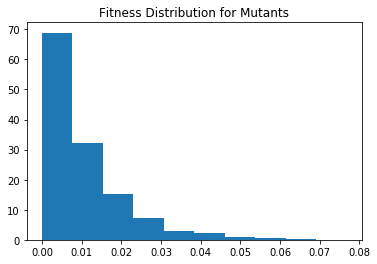

Number of mutants generated = 1954


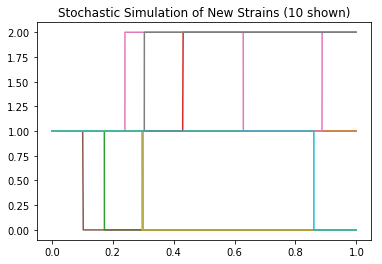

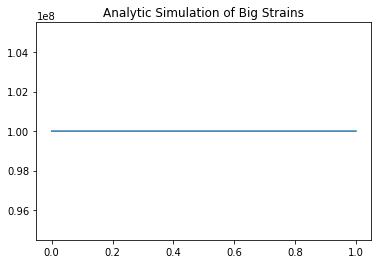

Number of newly established strains = 0
Number of dead strains = 1004


In [2]:
# run one full iteration of the simulation

# populate sim
LUCA = strain(N_pop=1e8, fitness=0, mu=2e-5)
sim = thunderflask(LUCA)
# initialize some variables
T_curr = 0
f_avg = 0 
mut_param = [1, 1]
dt = 1
# run mutation sim
sim.mutationSim(dt, T_curr, mut_param)
fitnesses = []
for bact in sim.smallStrains:
    fitnesses.append(bact.fitness)
fitnesses = np.array(fitnesses)
plt.hist(fitnesses, normed=True)
plt.title('Fitness Distribution for Mutants')
plt.show()
print('Number of mutants generated = {0}'.format(len(sim.smallStrains)))

# run stochastic sim
T_next, taus = sim.stochSim(T_approx=1, T_curr=T_curr, f_avg=f_avg)
N = 10
for i in range(N):
    bact = sim.smallStrains[i]
    t = bact.timepoints
    pop = bact.poptrace
    plt.plot(t, pop)
plt.title('Stochastic Simulation of New Strains ({0} shown)'.format(N))
plt.show()

# do analytic simulation
sim.analyticSim(T_curr=T_curr, taus=taus, f_avg=f_avg)
for bact in sim.bigStrains:
    t = bact.timepoints
    pop = bact.poptrace
    plt.plot(t, pop)
plt.title('Analytic Simulation of Big Strains')
plt.show()

# shuffle strains and look at changes
og_large_num = len(sim.bigStrains)
sim.strainShuffle(T_curr=T_next, f_avg=f_avg)
ng_large_num = len(sim.bigStrains)
print('Number of newly established strains = {0}'.format(ng_large_num - og_large_num))
print('Number of dead strains = {0}'.format(len(sim.deadStrains)))

100%|██████████| 100/100 [00:23<00:00,  1.66it/s]


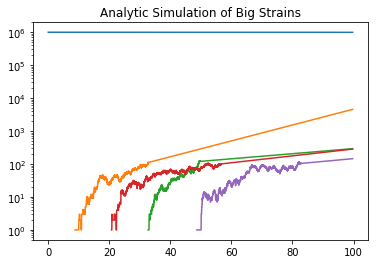

In [2]:
# run several iterations
# populate sim
LUCA = strain(N_pop=1e6, fitness=0, mu=2e-5)
sim = thunderflask(LUCA)
# initialize some variables
T_curr = 0
f_avg = 0 
mut_param = [1, 1]
dt = 1

def iterate(sim, iteration, dt, T_curr, f_avg, mut_param):
    # run mutation sim
    sim.mutationSim(dt, T_curr, mut_param)
    # run stochastic sim
    T_next, taus = sim.stochSim(T_approx=1, T_curr=T_curr, f_avg=f_avg)
    # do analytic simulation
    sim.analyticSim(T_curr=T_curr, taus=taus, f_avg=f_avg)
   
    # shuffle strains and look at changes
    sim.strainShuffle(T_curr=T_next, f_avg=f_avg)
    # update f_avg
    f_avg = sim.updateF_avg()
    
    return T_next, f_avg, sim

for i in tqdm(range(1,101)): 
    T_curr, f_avg, sim = iterate(sim, i, dt, T_curr, f_avg, mut_param)
    
for bact in sim.bigStrains:
    t = bact.timepoints
    pop = bact.poptrace
    plt.semilogy(t, pop)
plt.title('Analytic Simulation of Big Strains')
plt.show()

22.948935730573378

In [ ]:
count_dead = 0
for bact in sim.smallStrains:
    count_dead += (bact.N_pop < 1)
count_dead

In [ ]:
pops = []
for bact in sim.smallStrains:
    pops.append(bact.N_pop)
#pops = np.array(pops)
plt.hist(pops, bins=range(int(min(pops)), int(max(pops)) + 1, 1))
plt.title('Population sizes after one round of simulation (stoch)')
plt.show()

In [6]:
strains = []
count = 0
for i in range(10):
    strains.append(strain(N_pop = i, fitness=2*i))
    count += 2*i
    
sim2 = thunderflask(strains)
f_avg = sim2.updateF_avg()
f_avg

12.666666666666666

In [8]:
count/10

9.0